---

## 关于作者

本项目由 **Muhammad Bilal Ramzan** 开发，他是一位数据科学爱好者，专注于机器学习和深度学习领域。与我联系：

- [![Kaggle Logo](https://img.shields.io/badge/Kaggle-035a7d?style=flat-square&logo=kaggle&logoColor=white)](https://www.kaggle.com/mianbilal12)
- [![LinkedIn Logo](https://img.shields.io/badge/LinkedIn-0077B5?style=flat-square&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/bilal-ramzan/)
- [![Email Logo](https://img.shields.io/badge/Email-D14836?style=flat-square&logo=gmail&logoColor=white)](mailto:mianb0062@gmail.com)

---

---

<p style="font-family:newtimeroman; font-size:200%; text-align:center; color:#34661c;">

  🧠 <b>比特币时间序列分析</b> 📊

</p>

---

## ✨ **在开始之前**：

欢迎阅读这本关于**时间序列分析**的**综合指南**！本笔记本适用于那些想要探索时间序列预测的**数据爱好者**。无论你是这个领域的新手还是有经验的专业人士，你都会发现其中包含了**强大的工具**、**美丽的可视化**和**先进的模型**，帮助你取得成功。🌟

**让我们一起开始这段激动人心的旅程吧！** 🚀

---

### 📚 **目录**：

1. **关于数据集 📊**  
   了解我们将要使用的数据。

2. **数据预处理 🛠️**  
   清洗和准备数据以便进行分析。

3. **探索性数据分析 (EDA) 🔍**  
   可视化数据集中的模式和趋势。

4. **特征工程 ⚙️**  
   从数据中提取有意义的特征。

5. **建模 📈**  
    - **ARIMA 📉**  
    - **SARIMA 📅**  
    - **Prophet 🔮**  
    - **RNN 🧠**  
    - **LSTM 🕰️**  
    - **GRU 🔄**

6. **模型比较 📊**  
   比较不同模型的表现。

---

![GIF](https://media.giphy.com/media/7FBY7h5Psqd20/giphy.gif?cid=790b76118s4nxzfeooj1inznhoiemztzglcrmz5lw0iqsa1j&ep=v1_gifs_search&rid=giphy.gif&ct=g)


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">IMPORT_LIBRARIES</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

# 抑制警告
import warnings
warnings.filterwarnings("ignore")

# Matplotlib 和 Seaborn 配置
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

# Pandas 显示配置
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)  # 显示所有列

# 准备数据分析和可视化


In [2]:
# 加载数据

DATA = '/Users/sean/Jupyter_Projects/StockDataPrep/data/Bitcoin_Historical_Data.csv'

df = pd.read_csv(DATA)  # 读取CSV文件到DataFrame中。



# 将'Date'转换为日期时间格式

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # 将'Date'列转换为日期时间格式。无效格式将变为NaT。



# 检查无效日期

if df['Date'].isnull().any():  # 如果'Date'列在转换后存在空值：

    print("警告：某些日期无法解析，请检查数据集中的无效日期格式。")



# 提取年份

df['year'] = df['Date'].dt.year  # 从'Date'列中提取年份，并创建一个新的'year'列。



# 计算'dollars'列

df['dollars'] = 0.5 * (df['High'] + df['Low']) * df['Volume']  # 根据价格和交易量估算交易金额。



# 显示更新后的DataFrame的前几行

df.head()


,Date,Adj Close,Close,High,Low,Open,Volume,year,dollars
0,2014-09-17 00:00:00+00:00,457.334,457.334,468.174,452.422,465.864,21056800,2014,9692403013.794
1,2014-09-18 00:00:00+00:00,424.440,424.440,456.860,413.104,456.860,34483200,2014,14999571117.188
2,2014-09-19 00:00:00+00:00,394.796,394.796,427.835,384.532,424.103,37919700,2014,15402356548.270
3,2014-09-20 00:00:00+00:00,408.904,408.904,423.296,389.883,394.673,36863600,2014,14988352426.703
4,2014-09-21 00:00:00+00:00,398.821,398.821,412.426,393.181,408.085,26580100,2014,10706557238.968


<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">数据检查</p>

In [3]:
df.shape

(3724, 9)

In [4]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,year,dollars
0,2014-09-17 00:00:00+00:00,457.334,457.334,468.174,452.422,465.864,21056800,2014,9692403013.794
1,2014-09-18 00:00:00+00:00,424.440,424.440,456.860,413.104,456.860,34483200,2014,14999571117.188
2,2014-09-19 00:00:00+00:00,394.796,394.796,427.835,384.532,424.103,37919700,2014,15402356548.270
3,2014-09-20 00:00:00+00:00,408.904,408.904,423.296,389.883,394.673,36863600,2014,14988352426.703
4,2014-09-21 00:00:00+00:00,398.821,398.821,412.426,393.181,408.085,26580100,2014,10706557238.968


In [5]:
df.tail()

,Date,Adj Close,Close,High,Low,Open,Volume,year,dollars
3719,2024-11-22 00:00:00+00:00,98997.664,98997.664,99655.500,97222.664,98496.430,78473580551,2024,7724867233145794.000
3720,2024-11-23 00:00:00+00:00,97777.281,97777.281,99014.680,97232.891,99006.742,44414644677,2024,4358133052077130.500
3721,2024-11-24 00:00:00+00:00,98013.820,98013.820,98647.180,95788.078,97778.094,51712020623,2024,5027320030919161.000
3722,2024-11-25 00:00:00+00:00,93102.297,93102.297,98935.031,92642.914,98033.445,80909462490,2024,7750234290086495.000
3723,2024-11-26 00:00:00+00:00,91985.320,91985.320,94991.750,90770.812,93087.281,91656519855,2024,8513174999048464.000


In [6]:
# 查看比特币的最后收盘价

print((df['Close']).max())

print((df['Date']).max())

98997.6640625
2024-11-26 00:00:00+00:00


In [7]:
# 查看比特币最低收盘价

print((df['Close']).min())

print((df['Date']).min())

178.10299682617188
2014-09-17 00:00:00+00:00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       3724 non-null   datetime64[ns, UTC]
 1   Adj Close  3724 non-null   float64            
 2   Close      3724 non-null   float64            
 3   High       3724 non-null   float64            
 4   Low        3724 non-null   float64            
 5   Open       3724 non-null   float64            
 6   Volume     3724 non-null   int64              
 7   year       3724 non-null   int32              
 8   dollars    3724 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int32(1), int64(1)
memory usage: 247.4 KB


In [9]:
print("摘要统计信息:\n", df.describe())

摘要统计信息:
        Adj Close     Close      High       Low      Open           Volume  \
count   3724.000  3724.000  3724.000  3724.000  3724.000         3724.000   
mean   18848.683 18848.683 19251.922 18381.434 18825.294  18148784739.863   
std    20873.547 20873.547 21309.793 20365.354 20843.084  19758588385.840   
min      178.103   178.103   211.731   171.510   176.897      5914570.000   
25%     1198.755  1198.755  1217.055  1178.120  1192.668    351945744.000   
50%     9284.764  9284.764  9440.763  9134.779  9284.071  14428580410.500   
75%    30182.015 30182.015 30605.878 29580.906 30153.409  29198284972.500   
max    98997.664 98997.664 99655.500 97232.891 99006.742 350967941479.000   

          year               dollars  
count 3724.000              3724.000  
mean  2019.302   610461215323973.000  
std      2.954  1047990037192359.250  
min   2014.000        2307853373.308  
25%   2017.000      393348434777.591  
50%   2019.000   183431469956273.750  
75%   2022.000   7715237

<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">探索性数据分析 (EDA)</p>

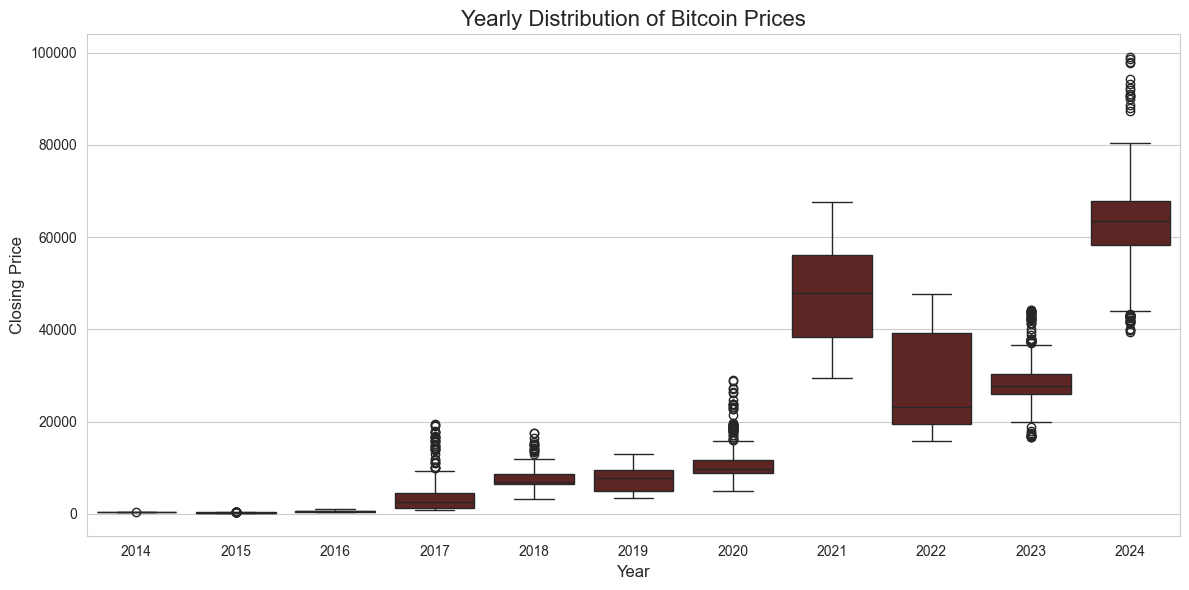

In [10]:
# 使用箱形图绘制年分布
plt.figure(figsize=(12, 6))

sns.boxplot(x='year', y='Close', data=df, color='#661d1c')

plt.title('Yearly Distribution of Bitcoin Prices', fontsize=16)

plt.xlabel('Year', fontsize=12)

plt.ylabel('Closing Price', fontsize=12)

plt.tight_layout()

plt.show()

<Axes: xlabel='Date', ylabel='Close'>

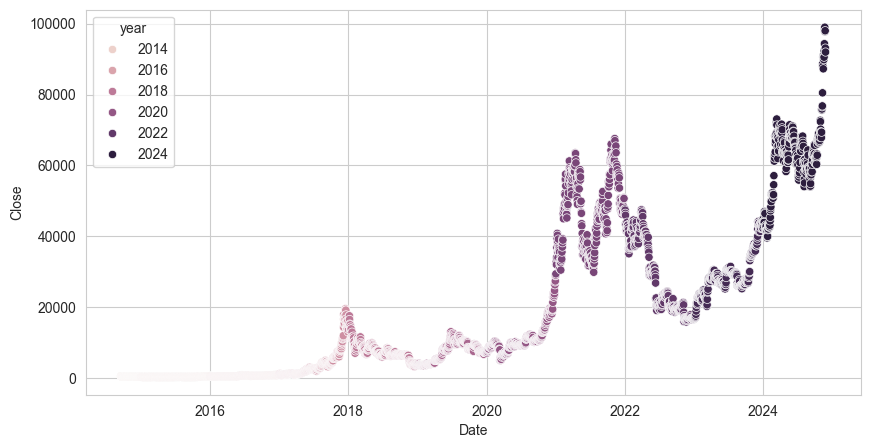

In [11]:
# 使用箱形图绘制年分布
from seaborn import scatterplot

plt.figure(figsize=(10, 5))

scatterplot(data=df, x='Date', y='Close', hue='year', color='#ab2222')

<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">比特币收盘价随时间变化</p>

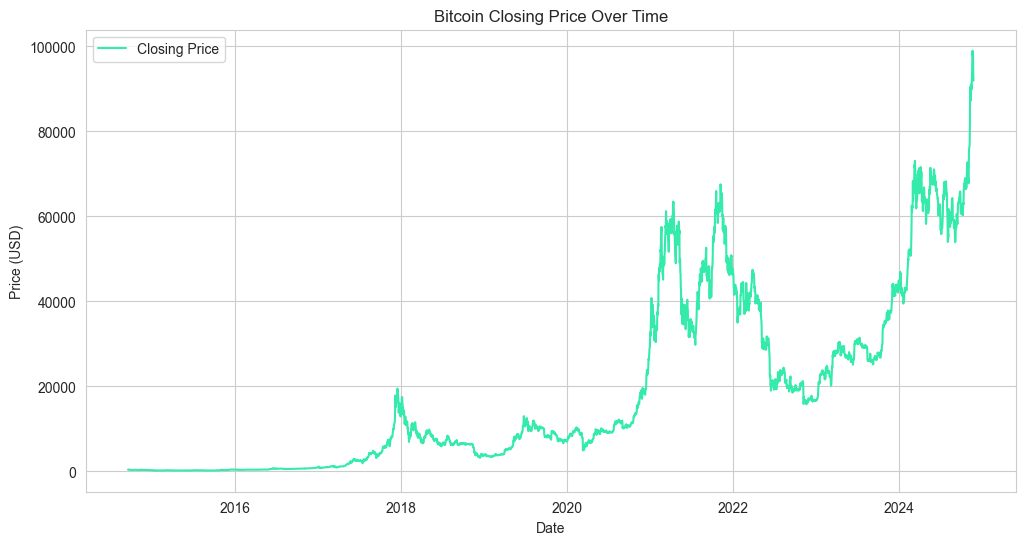

In [12]:


plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='Date', y='Close', label='Closing Price', color='#34ebab')

plt.title('Bitcoin Closing Price Over Time')

plt.xlabel('Date')

plt.ylabel('Price (USD)')

plt.legend()

plt.show()


![GIF Title](https://media.giphy.com/media/0XJeBn8nx6HDwdWIDg/giphy.gif?cid=790b76118s4nxzfeooj1inznhoiemztzglcrmz5lw0iqsa1j&ep=v1_gifs_search&rid=giphy.gif&ct=g)


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">比特币每日价格区间</p>

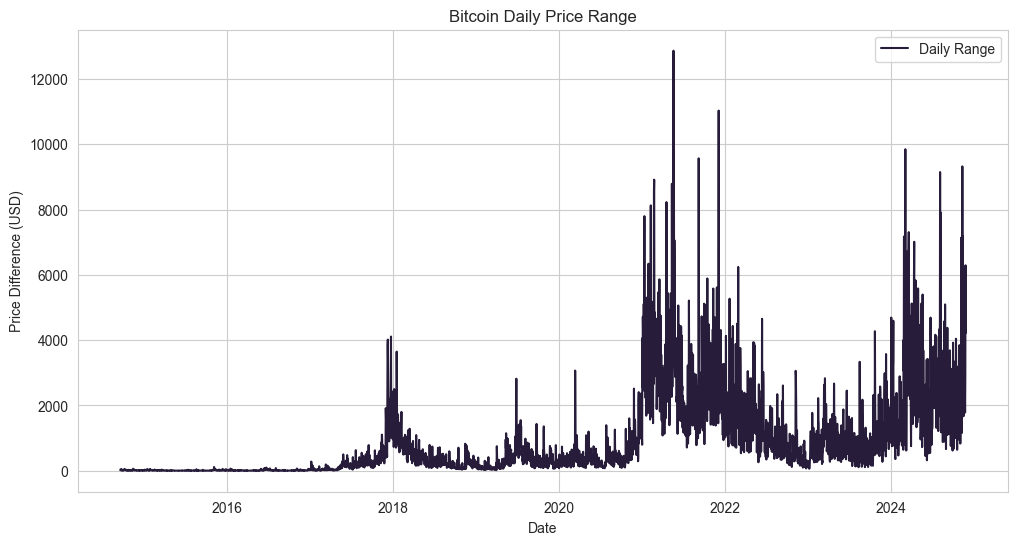

In [13]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='Date', y=df['High'] - df['Low'], label='Daily Range',color='#271d3b')

plt.title('Bitcoin Daily Price Range')

plt.xlabel('Date')

plt.ylabel('Price Difference (USD)')

plt.legend()

plt.show()


## 图表的目的：

此图表帮助：

1. **分析趋势**：

   - 它展示了比特币的`收盘价`随时间（在此情况下为年份）变化的情况。

2. **识别关系**：

   - 通过拟合回归线，提供有关`年份`与`收盘价`之间关系是否在增加、减少或保持不变的洞察。

3. **识别异常值**：

   - 显著偏离回归线的散点可能是异常值。


<Axes: xlabel='year', ylabel='Close'>

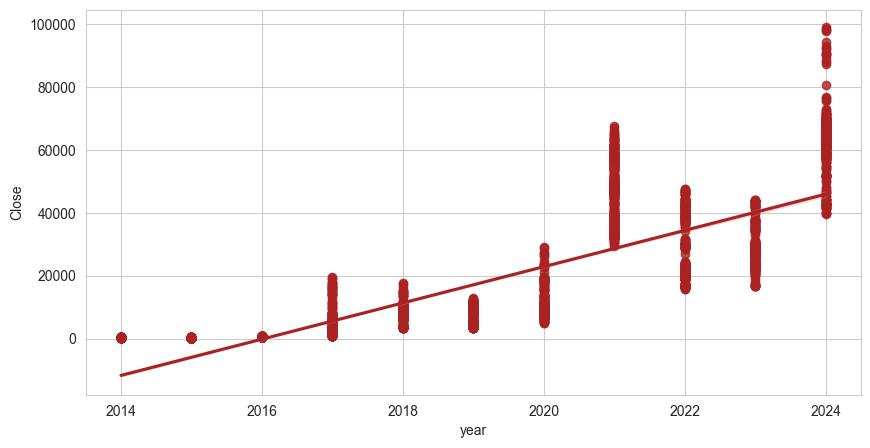

In [14]:
from seaborn import regplot



plt.figure(figsize=(10, 5))

regplot(data=df, x='year', y='Close',color='#ab2222') 

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">比特币交易量</p>

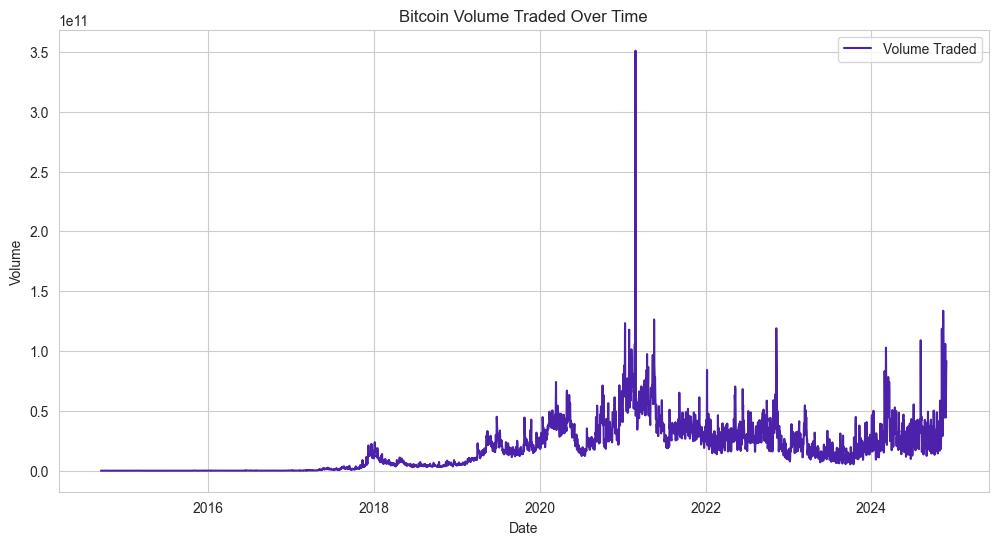

In [15]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='Date', y='Volume', label='Volume Traded',color='#4d22ab')

plt.title('Bitcoin Volume Traded Over Time')

plt.xlabel('Date')

plt.ylabel('Volume')

plt.legend()

plt.show()


In [15]:
# 绘制数据的相关矩阵

corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')


,Date,Adj Close,Close,High,Low,Open,Volume,year,dollars
Date,1.000000,0.817026,0.817026,0.815427,0.819309,0.817031,0.632858,0.995200,0.558248
Adj Close,0.817026,1.000000,1.000000,0.999599,0.999486,0.999025,0.654523,0.815350,0.811738
Close,0.817026,1.000000,1.000000,0.999599,0.999486,0.999025,0.654523,0.815350,0.811738
High,0.815427,0.999599,0.999599,1.000000,0.999183,0.999551,0.661160,0.813900,0.816993
Low,0.819309,0.999486,0.999486,0.999183,1.000000,0.999324,0.645355,0.817393,0.803929
Open,0.817031,0.999025,0.999025,0.999551,0.999324,1.000000,0.654951,0.815374,0.811309
Volume,0.632858,0.654523,0.654523,0.661160,0.645355,0.654951,1.000000,0.638235,0.833192
year,0.995200,0.815350,0.815350,0.813900,0.817393,0.815374,0.638235,1.000000,0.560943
dollars,0.558248,0.811738,0.811738,0.816993,0.803929,0.811309,0.833192,0.560943,1.000000


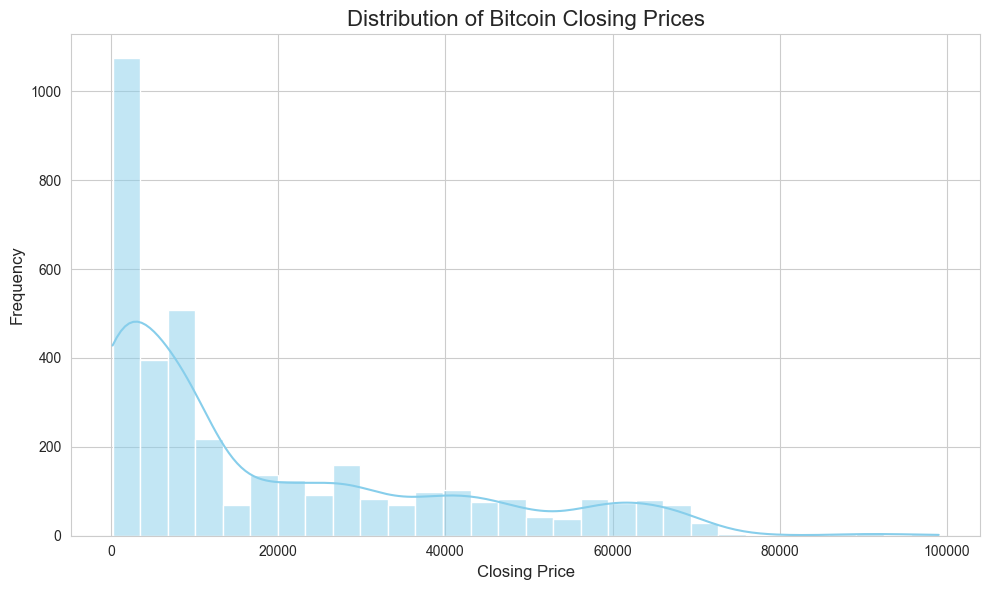

In [ ]:

# 绘制直方图
plt.figure(figsize=(10, 6))

sns.histplot(df['Close'], bins=30, kde=True, color='skyblue')

# 添加标题和标签

plt.title('Distribution of Bitcoin Closing Prices', fontsize=16)

plt.xlabel('Closing Price', fontsize=12)

plt.ylabel('Frequency', fontsize=12)



# 显示绘图
plt.tight_layout()

plt.show()


# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b>  数据预处理 深度学习模型 </p></div>

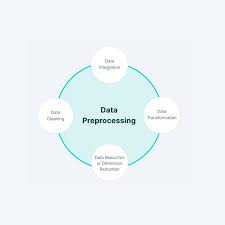

In [18]:
# 创建一个只有Close列的新数据框

data = df.filter(['Close'])

# 将数据帧转换为numpy数组

dataset = data.values

# 获取要训练模型的行数

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3538

<div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden">
  <p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0">
    <b> </b> 缩放
  </p>
</div>

## 哪些模型需要缩放？ <br>

#### 1. ARIMA 和 SARIMA：

这些模型通常不需要缩放，因为它们直接处理原始的时间序列数据。然而，如果数据的取值范围很广，或者不同特征的尺度差异很大，缩放可能有助于提高模型的表现。

#### 2. LSTM：

这些模型通常从缩放中受益，特别是在使用如sigmoid或tanh这样的激活函数时，它们对输入数据的尺度非常敏感。缩放有助于通过将所有特征调整到类似的尺度来稳定训练，这样可以加速收敛并防止梯度爆炸。


In [20]:
# 缩放数据

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00282567],
       [0.0024928 ],
       [0.00219281],
       ...,
       [0.99004404],
       [0.9403421 ],
       [0.92903891]])

In [22]:
# 创建训练数据集
# 创建缩放的训练数据集

train_data = scaled_data[0:int(training_data_len), :]

# 将数据拆分为x_train和y_train数据集

x_train = []

y_train = []



for i in range(60, len(train_data)):

    x_train.append(train_data[i-60:i, 0])

    y_train.append(train_data[i, 0])

    if i<= 61:

        print(x_train)

        print(y_train)

        print()

        

# 将x_train和y_train转换为numpy数组
x_train, y_train = np.array(x_train), np.array(y_train)



# 重塑数据

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# x_train.shape

[array([0.00282567, 0.0024928 , 0.00219281, 0.00233558, 0.00223355,
       0.00226725, 0.00260766, 0.0024803 , 0.0023626 , 0.00229025,
       0.00224062, 0.00201456, 0.00199722, 0.00211336, 0.00207967,
       0.00199322, 0.00183576, 0.00152564, 0.00144108, 0.00153791,
       0.00159972, 0.00176926, 0.00189156, 0.00185651, 0.00186396,
       0.0020284 , 0.00214847, 0.00225428, 0.00219258, 0.00206895,
       0.00208112, 0.00215887, 0.00213969, 0.00207188, 0.00210861,
       0.00207504, 0.00182468, 0.00182395, 0.00171189, 0.00178711,
       0.00176975, 0.00181659, 0.00159369, 0.00169199, 0.00162132,
       0.0014941 , 0.00149554, 0.00151236, 0.00154209, 0.00163311,
       0.00173232, 0.00166275, 0.00169384, 0.00187373, 0.00191077,
       0.00191857, 0.0024839 , 0.0024553 , 0.0022234 , 0.00200396])]
[0.0021228488513504243]

[array([0.00282567, 0.0024928 , 0.00219281, 0.00233558, 0.00223355,
       0.00226725, 0.00260766, 0.0024803 , 0.0023626 , 0.00229025,
       0.00224062, 0.00201456, 0.

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">LSTM Model</p>

In [23]:
from keras.models import Sequential

from keras.layers import Dense, LSTM



# Build the LSTM model

model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))



# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')



# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
3478/3478 [==============================] - 32s 9ms/step - loss: 7.3746e-04
Epoch 2/2
3478/3478 [==============================] - 31s 9ms/step - loss: 3.6206e-04


In [24]:
# 创建测试数据集
test_data = scaled_data[training_data_len - 60: , :]

# 创建数据集x_test和y_test

x_test = []

y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):

    x_test.append(test_data[i-60:i, 0])

    

# 将数据转换为numpy数组

x_test = np.array(x_test)



# 重塑数据

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))



# 获取模型预测的价格值

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)



# 得到均方根误差（RMSE）

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

rmse

6/6 [==============================] - 0s 12ms/step


2617.936789594779

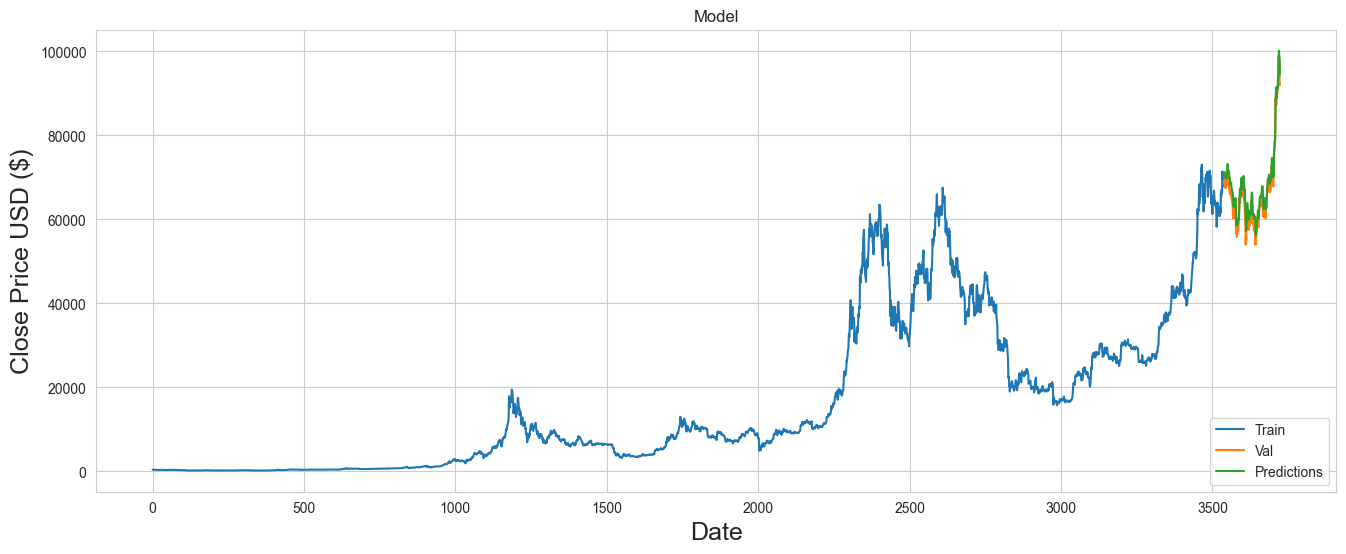

In [25]:
# 绘制数据

train = data[:training_data_len]

valid = data[training_data_len:]

valid['Predictions'] = predictions

# 可视化数据

plt.figure(figsize=(16,6))

plt.title('Model')

plt.xlabel('Date', fontsize=18)

plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'])

plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

---

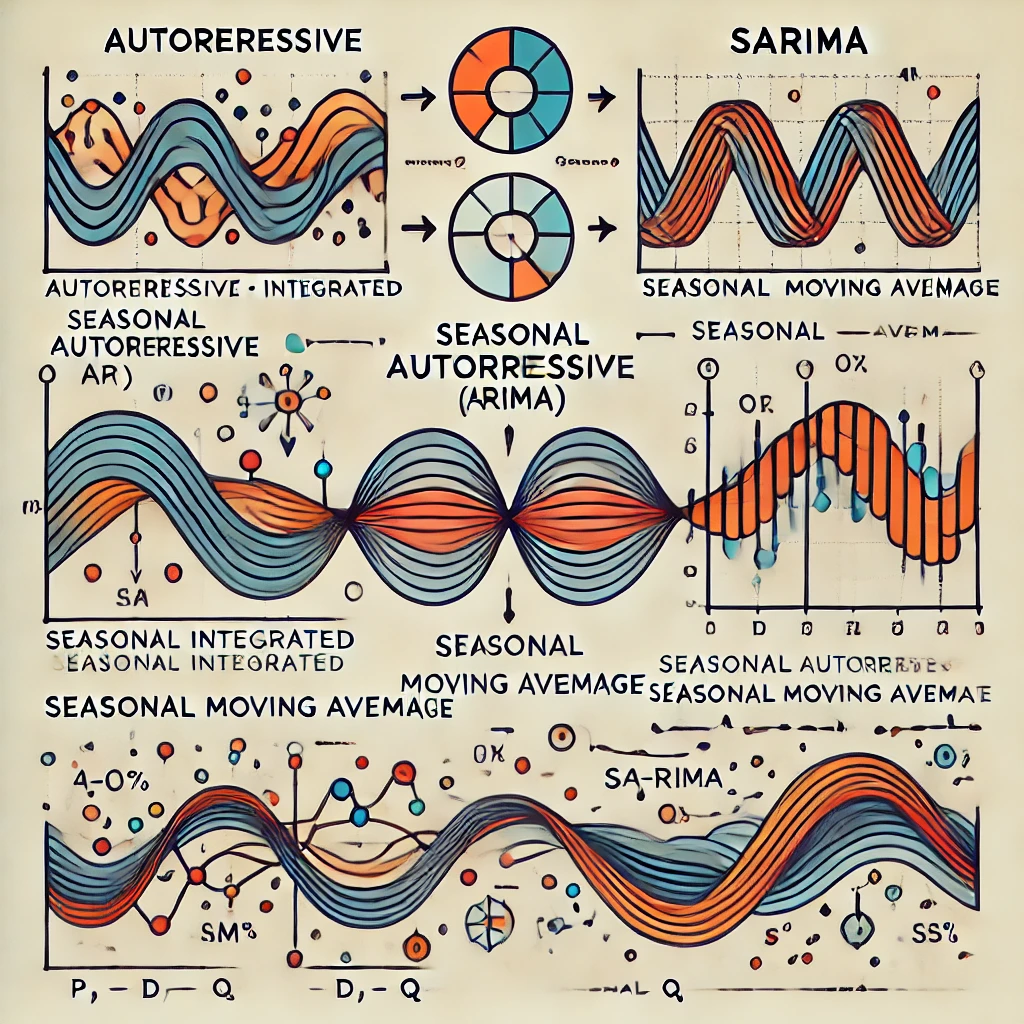

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">ARIMA 和 SARIMA</p>

**ARIMA** ：非季节性自回归积分滑动平均模型

**SARIMA** ：季节性ARIMA模型

**SARIMAX** ：带外生变量的季节性ARIMA模型

如果时间序列具有季节性模式，则需要添加季节性项，这样就变成了SARIMA，季节性ARIMA模型的简称。

## 构建ARIMA-SARIMA模型的步骤：

#### 1. 检查平稳性：

使用ADF（增强的迪基-富勒检验）和KPSS（Kwiatkowski-Phillips-Schmidt-Shin检验）等测试验证每个系列的平稳性。可以通过ACF和PACF图来展示。

#### 2. 使系列平稳：

如果需要，应用转换使目标变量和外生变量平稳。常见方法包括差分和对数转换。

#### 3. 建立模型关系：

在ARIMA或SARIMA模型中使用平稳化后的系列数据。

对于ARIMA（自回归积分滑动平均）和SARIMA（季节性自回归积分滑动平均）模型，确保在拟合模型之前使时间序列数据平稳是非常重要的。这些模型假设时间序列数据是平稳的，即其统计性质（如均值、方差和自相关结构）随时间不变。如果数据是非平稳的，可能会导致偏差的参数估计和不可靠的预测。

为了使数据平稳，通常需要去除趋势和季节性。这可以通过差分（去趋势）和季节性差分（去季节性）等方法来完成。一旦数据变得平稳，就可以将ARIMA或SARIMA模型拟合到转换后的数据上。

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> 检查平稳性</p> </div>


In [29]:
# 数据平稳性检查
from statsmodels.tsa.stattools import adfuller

def adf_test(df):

    result = adfuller(df)

    print('统计 ADF: %f' % result[0])

    print('p-value: %f' % result[1])

    if result[1] <= 0.05:

        print("拒绝原假设。数据是平稳的。")

    else:

        print("拒绝原假设失败。数据不是平稳的")



adf_test(df['Close'])

统计 ADF: 0.266534
p-value: 0.975756
拒绝原假设失败。数据不是平稳的


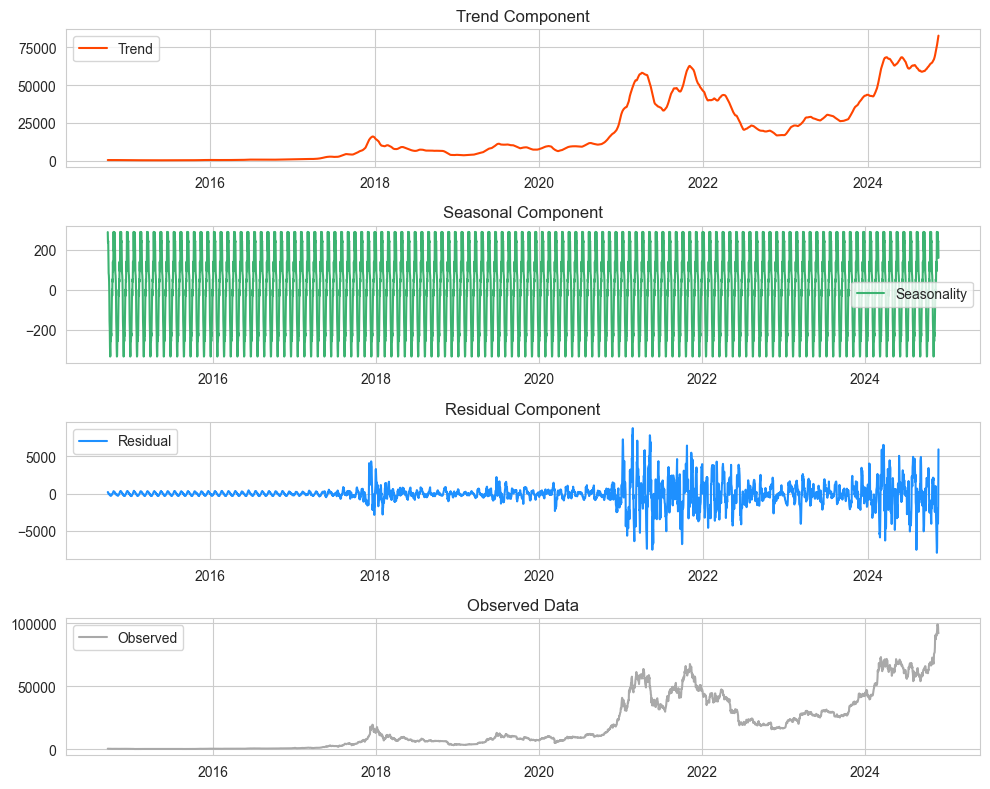

In [31]:
# 导入所需库

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 分解“close”列以查看趋势，季节性和残差
decompose = seasonal_decompose(df['Close'], model='additive', period=30)

# 使用自定义颜色绘图
plt.figure(figsize=(10, 8))

# 绘制趋势分量
plt.subplot(411)
plt.plot(df['Date'], decompose.trend, color='orangered', label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

# 绘制季节性的组件
plt.subplot(412)
plt.plot(df['Date'], decompose.seasonal, color='mediumseagreen', label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonal Component')


# 绘制地块残差分量
plt.subplot(413)
plt.plot(df['Date'], decompose.resid, color='dodgerblue', label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

# 绘制观测（原始）数据
plt.subplot(414)
plt.plot(df['Date'], df['Close'], color='darkgray', label='Observed')
plt.legend(loc='best')
plt.title('Observed Data')

# 调整布局以防止重叠
plt.tight_layout()
plt.show()


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">ACF与差分可视化</p>

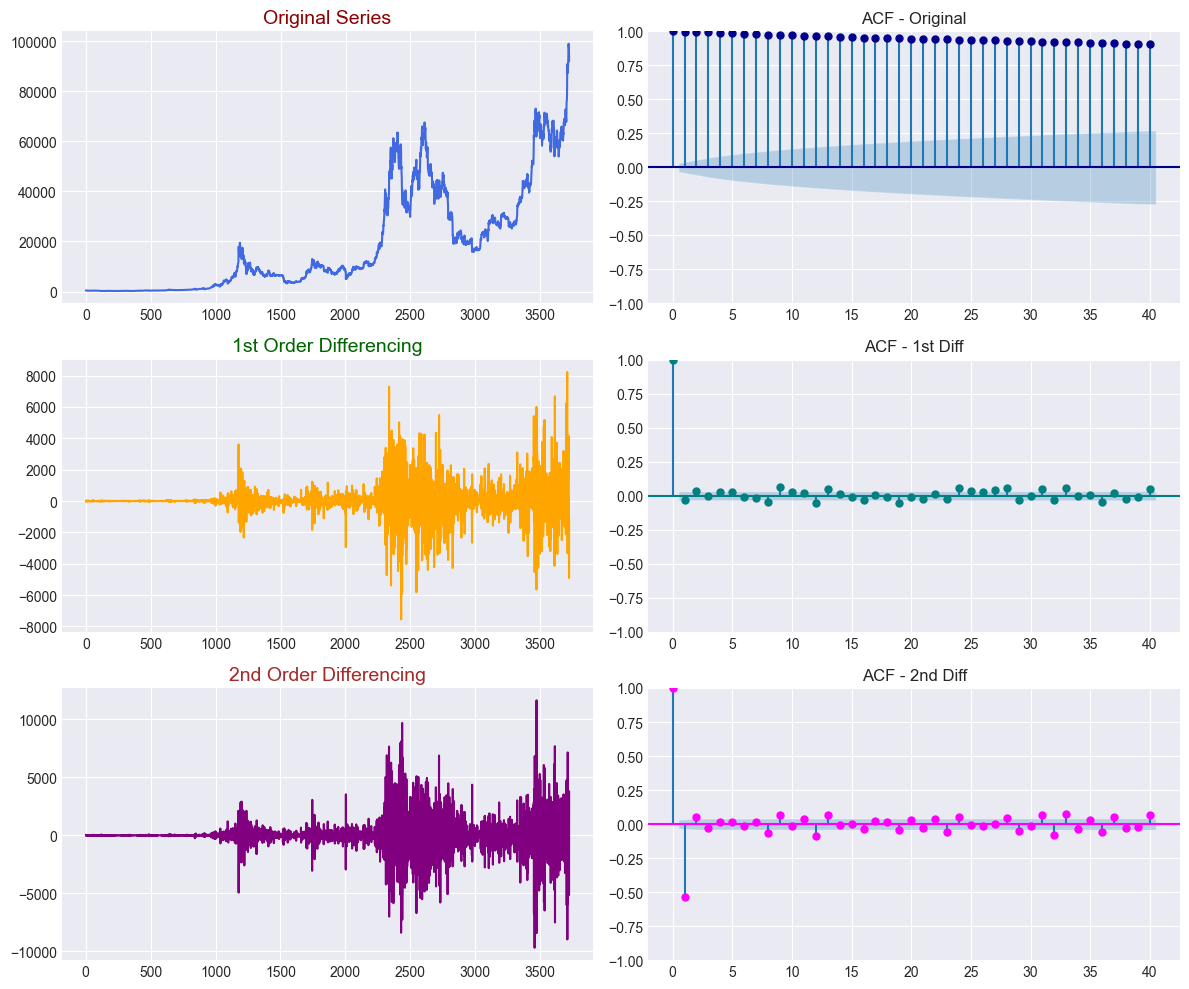

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# 设置自定义样式以获得更好的可视化效果
plt.style.use('seaborn-darkgrid')

# 创建子图，展示原始序列和差分后的序列
fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=False)

# 原始序列
axes[0, 0].plot(df['Close'], color='royalblue')
axes[0, 0].set_title('Original Series', fontsize=14, color='darkred')
plot_acf(df['Close'], ax=axes[0, 1], lags=40, color='darkblue', title='ACF - Original')

# 一阶差分
axes[1, 0].plot(df['Close'].diff(), color='orange')
axes[1, 0].set_title('1st Order Differencing', fontsize=14, color='darkgreen')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1], lags=40, color='teal', title='ACF - 1st Diff')

# 二阶差分
axes[2, 0].plot(df['Close'].diff().diff(), color='purple')
axes[2, 0].set_title('2nd Order Differencing', fontsize=14, color='brown')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1], lags=40, color='magenta', title='ACF - 2nd Diff')

# 调整布局并显示图形
plt.tight_layout()
plt.show()


### 解释

1. **原始序列**：展示原始数据及其在不同时间滞后的自相关情况。

2. **一阶差分**：通过去除趋势来检查平稳性，并展示一阶差分后的自相关情况。

3. **二阶差分**：去除剩余的趋势或季节性，进一步展示平稳性。

---

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">p, d 和 q 的含义</p>

- **p**:  
    - p 是自回归（AR）项的阶数。它表示用于预测的 `Y` 的滞后数，也就是使用多少个过去的观察值作为特征。

<br>

- **d**:  
    - 自回归（AR）在 ARIMA 模型中意味着它是一个线性回归模型，使用自身的滞后值作为预测变量。线性回归模型通常在预测变量不相关且彼此独立时效果最佳。因此，我们需要使时间序列变为平稳序列。

    - 使序列平稳的最常见方法是差分。即用当前值减去前一个值。有时，根据序列的复杂性，可能需要进行多次差分。

    - 因此，d 的值是使序列平稳所需的最小差分次数。如果时间序列已经是平稳的，则 d = 0。

<br>

- **q**:  
    - q 是移动平均（MA）项的阶数。它表示应纳入 ARIMA 模型的滞后预测误差的数量。

       0
0  1.000
1  0.997
2  0.995
3  0.992
4  0.989
5  0.985
6  0.982
7  0.979
8  0.977
9  0.974
10 0.971
11 0.968
12 0.965
13 0.963
14 0.960
15 0.957
16 0.954
17 0.952
18 0.950
19 0.948
20 0.946
21 0.944
22 0.942
23 0.940
24 0.939
25 0.937
26 0.935
27 0.933
28 0.931
29 0.928
30 0.926
31 0.924
32 0.922
33 0.920
34 0.918
35 0.916


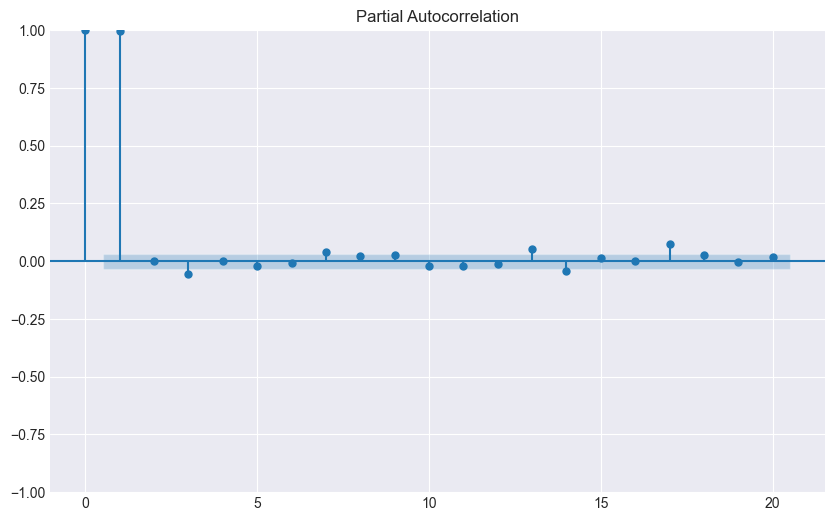

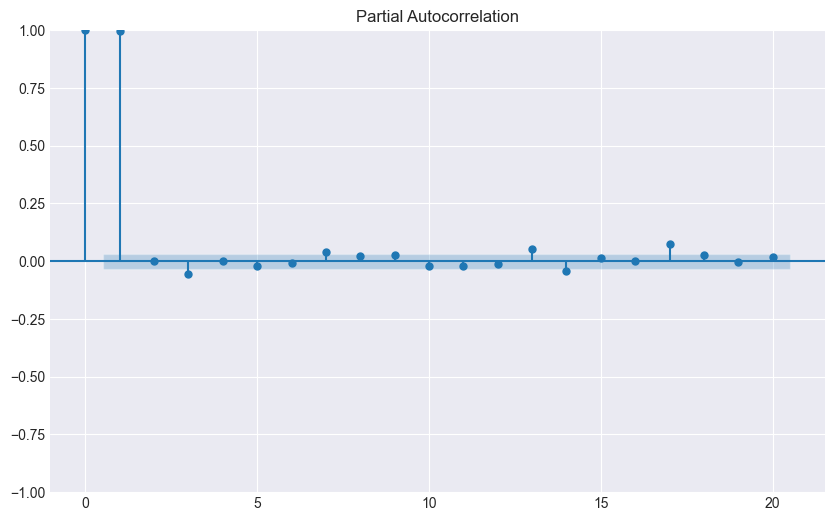

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# pd.plotting.autocorrelation_plot(df['Close'])  # 可选的自动相关性绘图方法，这行代码被注释掉了

# plot_acf(df['Close'], alpha=0.05)  # 绘制自相关函数图 (ACF)，alpha=0.05 设置置信区间

from statsmodels.tsa.stattools import acf, pacf

# 计算自相关函数（ACF）
x_acf = pd.DataFrame(acf(df['Close']))

# 打印自相关函数（ACF）值
print(x_acf)

# 计算偏自相关函数（PACF）
from statsmodels.tsa.stattools import acf, pacf

# 绘制偏自相关函数图 (PACF)，lags=20 设置滞后阶数，alpha=0.05 设置置信区间
plot_pacf(df['Close'], lags=20, alpha=0.05)


----

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">ARIMA Model</p>

In [34]:
# 将数据分割成训练集和测试集，用于 ARIMA 模型训练

train_data = dataset[:training_data_len, 0]  # 前 95% 的数据作为训练集

test_data = dataset[training_data_len:, 0]   # 剩余 5% 的数据作为测试集


In [35]:
# 定义 ARIMA 模型的参数 (p, d, q)
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 2, 1, 2  # 这里设置 ARIMA 模型的阶数 (p, d, q)，可以调整这些值以获得更好的结果

# 创建并拟合 ARIMA 模型
arima_model = ARIMA(train_data, order=(p, d, q))  # 使用训练数据和指定的阶数创建 ARIMA 模型
arima_fit = arima_model.fit()  # 拟合 ARIMA 模型，得到训练后的模型


In [36]:
from sklearn.metrics import mean_squared_error

# 预测剩余 5% 的数据

forecast_steps = len(test_data)  # 预测步数等于测试数据的长度

arima_forecast = arima_fit.forecast(steps=forecast_steps)  # 使用训练好的 ARIMA 模型进行预测，预测步数为 forecast_steps

# 计算 RMSE 用于评估模型表现

rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))  # 计算预测值与实际值之间的均方根误差（RMSE）

print(f"ARIMA RMSE: {rmse}")  # 打印 RMSE 值，用于评估 ARIMA 模型的预测精度


ARIMA RMSE: 9652.537733140553


---

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#34661c;">SARIMA Model</p>

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 定义 SARIMA 模型的参数

# (P, D, Q, s) 用于季节性部分（s = 12 表示月度季节性，按需调整）
p, d, q = 2, 1, 2  # 非季节性部分的 ARIMA 参数

P, D, Q, s = 1, 1, 1, 12  # 季节性部分的 ARIMA 参数，其中 s = 12 表示一年12个月，适用于月度数据（如有季节性）
# 如果数据没有季节性，可以适当调整 s 或将季节性参数设置为 0

# 创建并拟合 SARIMA 模型
sarima_model = SARIMAX(train_data, 

                       order=(p, d, q),  # 非季节性部分的参数 (p, d, q)
                       
                       seasonal_order=(P, D, Q, s),  # 季节性部分的参数 (P, D, Q, s)

                       enforce_stationarity=False,  # 不强制平稳性，允许不平稳数据

                       enforce_invertibility=False)  # 不强制可逆性，允许不满足可逆性的模型

sarima_fit = sarima_model.fit(disp=False)  # 拟合 SARIMA 模型，不显示拟合过程


/opt/anaconda3/envs/abc/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
# 预测剩余 5% 的数据

forecast_steps = len(test_data)  # 预测步数等于测试数据的长度

sarima_forecast = sarima_fit.forecast(steps=forecast_steps)  # 使用训练好的 SARIMA 模型进行预测，预测步数为 forecast_steps

# 计算 RMSE 用于评估模型表现

rmse = np.sqrt(mean_squared_error(test_data, sarima_forecast))  # 计算预测值与实际值之间的均方根误差（RMSE）

print(f"SARIMA RMSE: {rmse}")  # 打印 SARIMA 模型的 RMSE 值，用于评估其预测精度


SARIMA RMSE: 10036.374015657904


In [39]:
sarima_forecast.max()

74909.77323211802

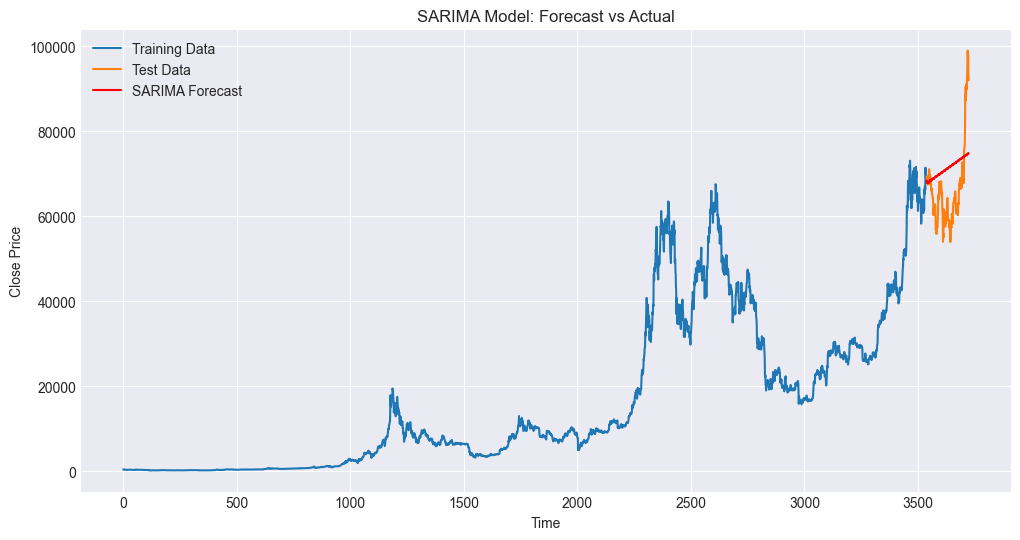

In [40]:
# 绘制数据和SARIMA预测

plt.figure(figsize=(12, 6))

plt.plot(range(len(train_data)), train_data, label='Training Data')

plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test Data')

plt.plot(range(len(train_data), len(train_data) + len(test_data)), sarima_forecast, label='SARIMA Forecast', color='red')

plt.title('SARIMA Model: Forecast vs Actual')

plt.xlabel('Time')

plt.ylabel('Close Price')

plt.legend()

plt.show()


---

### 为什么 LSTM 是最好的模型：

1. **非线性建模能力**：
   - LSTM（长短期记忆网络）能够捕捉时间序列中的复杂非线性模式。相比之下，ARIMA 和 SARIMA 模型假设数据是线性的，可能无法有效捕捉到复杂的非线性趋势，因此在面对复杂的数据时，LSTM 更具优势。

2. **序列记忆能力**：
   - LSTM 的优势在于其能够学习数据中的长期依赖关系（即过去的趋势对未来的影响）。对于许多时间序列预测任务，历史数据的长期趋势对未来预测至关重要，而 LSTM 能够有效利用这些长时间跨度的依赖关系。

3. **较低的 RMSE**：
   - 从 RMSE（均方根误差）值可以看出，LSTM 的 RMSE 值显著低于 ARIMA 和 SARIMA。这表明 LSTM 在预测准确性上远超这两种统计模型。较低的 RMSE 值意味着 LSTM 对数据的拟合更好，预测效果更精准。

### 总结：
LSTM 模型能够在处理具有非线性特征和复杂长期依赖的时间序列问题时展现出更强的能力。与传统的统计模型 ARIMA 和 SARIMA 相比，LSTM 在预测准确度上有显著的优势，尤其在较长时间跨度的预测任务中，其性能更为突出。